In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import sys
sys.path.insert(0, '../..')

import quan_utils
import pulp

In [2]:
prob_df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = prob_df['Real'].value_counts()

constraints = np.linspace(0.4, 0.6, 11)

In [15]:
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = prob_df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = increase_from_best_df[type_] - increase_from_best_df['Best']
    
increase_from_best_df.head()

,HouseholdID,Real,Reentered,ES,PSH,TH,RRH,PREV,Best
1,2028039,2,0,0.153207,0.000000,0.078216,0.125825,0.019835,0.271801
2,2036520,2,0,0.138807,0.000000,0.077800,0.148701,0.029491,0.188743
3,2108682,2,0,0.080806,0.654604,0.031637,0.072591,0.000000,0.106168
4,2116994,2,0,0.086533,0.069397,0.035603,0.091095,0.000000,0.148293
5,2154639,2,0,0.109084,0.364372,0.042330,0.075311,0.000000,0.190321


In [20]:
increase_from_best_df[increase_from_best_df[types] > 0][types].min().min()

4.780999999995372e-06

In [34]:
compare_dfs = []

for constraint in constraints:
    helper = quan_utils.AssignmentHelper()
    helper.update_constraints(fairness_best_constraint=constraint)
    
    sol_df = helper.ip_solve()
    if sol_df is False:
        compare_dfs.append(False)
    else:
        compare_dfs.append(helper.compare_prob(sol_df))
    
    print(constraint, pulp.LpStatus[helper.prob.status])

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.4 Not Solved


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.42000000000000004 Not Solved
0.44 Optimal
0.46 Optimal
0.48 Optimal
0.5 Optimal
0.52 Optimal
0.54 Optimal
0.56 Optimal
0.58 Optimal
0.6 Optimal


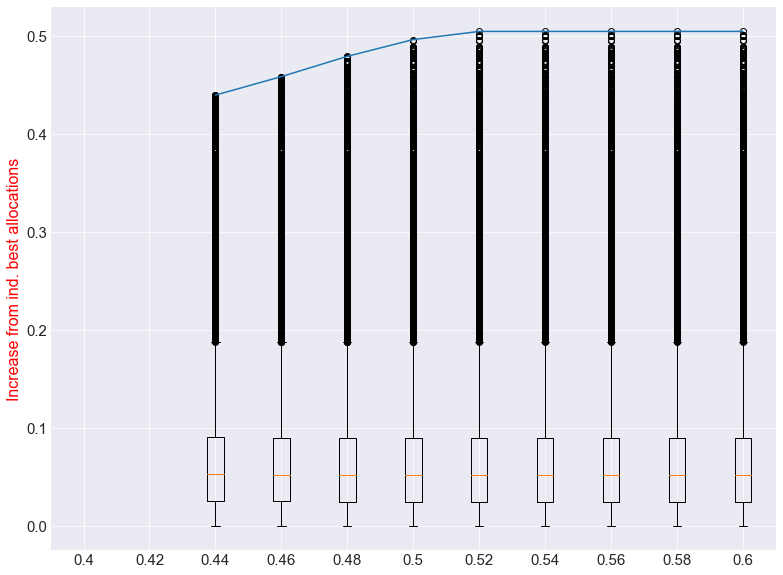

In [49]:
f, ax1 = plt.subplots(figsize=(13, 10))

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax1.boxplot(
            df['Input_to_best'],
            positions=[round(c, 2)],
            widths=[0.005]
        )

# ax2 = ax1.twinx()
ax1.plot(
    constraints,
    [df['Input_to_best'].max()
     if df is not False else np.nan
     for df in compare_dfs]
)
        
ax1.set_ylabel('Increase from ind. best allocations', color='red', fontsize=16)
ax1.set_xlim(np.min(constraints) - 0.01, np.max(constraints) + 0.01)

ax1.set_xticks(constraints)
ax1.set_xticklabels(np.round(constraints, 2))

plt.show()

In [50]:
constraints = np.linspace(0.42, 0.46, 11)

compare_dfs = []

for constraint in constraints:
    helper = quan_utils.AssignmentHelper()
    helper.update_constraints(fairness_best_constraint=constraint)
    
    sol_df = helper.ip_solve()
    if sol_df is False:
        compare_dfs.append(False)
    else:
        compare_dfs.append(helper.compare_prob(sol_df))
    
    print(constraint, pulp.LpStatus[helper.prob.status])

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.42 Not Solved


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.424 Not Solved


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.428 Not Solved


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.432 Not Solved
0.436 Optimal
0.44 Optimal
0.444 Optimal
0.448 Optimal
0.452 Optimal
0.456 Optimal
0.46 Optimal


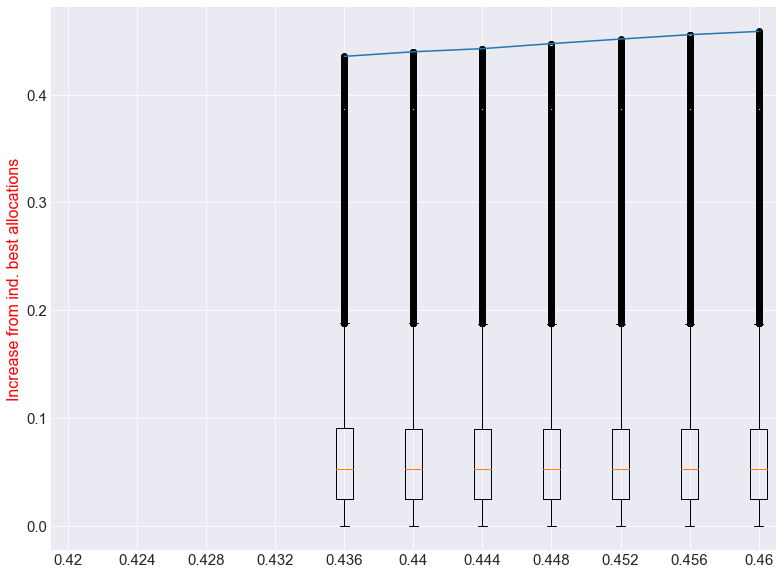

In [52]:
f, ax1 = plt.subplots(figsize=(13, 10))

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax1.boxplot(
            df['Input_to_best'],
            positions=[round(c, 3)],
            widths=[0.001]
        )

# ax2 = ax1.twinx()
ax1.plot(
    constraints,
    [df['Input_to_best'].max()
     if df is not False else np.nan
     for df in compare_dfs]
)
        
ax1.set_ylabel('Increase from ind. best allocations', color='red', fontsize=16)
ax1.set_xlim(np.min(constraints) - 0.001, np.max(constraints) + 0.001)

ax1.set_xticks(constraints)
ax1.set_xticklabels(np.round(constraints, 3))

plt.show()

In [3]:
def is_feasible(constraint):
    helper = quan_utils.AssignmentHelper()
    helper.update_constraints(fairness_best_constraint=constraint)
    
    sol_df = helper.ip_solve()
    
    if sol_df is False:
        return False
    return True

def binary_search(lower_bound, upper_bound, num_iters):
    iter_count = 0
    
    if is_feasible(lower_bound):
        return lower_bound, iter_count
    
    if not is_feasible(upper_bound):
        return upper_bound, iter_count
    
    while iter_count < num_iters:
        print(f'Search in {lower_bound} and {upper_bound}')
        
        mid = (lower_bound + upper_bound) / 2
        
        if is_feasible(mid):
            upper_bound = mid
            iter_count += 1
        
        else:
            lower_bound = mid
            iter_count += 1
    
    if is_feasible(mid):
        return mid, iter_count
    
    return upper_bound, iter_count

In [10]:
binary_search(0.42, 0.436, 20)

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.42 and 0.436


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.428 and 0.436


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.432 and 0.436
Search in 0.432 and 0.434
Search in 0.432 and 0.433
Search in 0.432 and 0.4325
Search in 0.432 and 0.43225
Search in 0.432 and 0.432125
Search in 0.432 and 0.4320625
Search in 0.432 and 0.43203125
Search in 0.432 and 0.432015625
Search in 0.432 and 0.4320078125


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.43200390624999996 and 0.4320078125
Search in 0.43200390624999996 and 0.43200585937499997
Search in 0.43200390624999996 and 0.43200488281249994


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.43200439453124995 and 0.43200488281249994
Search in 0.43200439453124995 and 0.43200463867187494


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.43200451660156247 and 0.43200463867187494
Search in 0.43200451660156247 and 0.43200457763671873


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Search in 0.4320045471191406 and 0.43200457763671873


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')
/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


(0.43200457763671873, 20)

In [22]:
is_feasible(0.4320046)

True

In [23]:
is_feasible(0.43200458)

True